In [3]:
# There must exists a folder called Ficheros in the directory where this file is saved, in which are kept the csv with the raw exported data of the Twitter users
#Python 3.9
import csv
import os
import pandas as pd #1.3.5
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report #1.0.0

columnas=[]
ficheros=os.listdir('./Ficheros/')
df1=pd.DataFrame()
df2=pd.DataFrame()
for i in range(len(ficheros)):
    temp_fichero='./Ficheros/'+ficheros[i]
    print(temp_fichero)
    temp_df1 = pd.read_csv(temp_fichero,error_bad_lines=False,sep=';', skip_blank_lines=True ,usecols=['username','Type','Cate_1','Cate_2','Cate_3','tweet'])
    temp_df2 = pd.read_csv(temp_fichero,error_bad_lines=False,sep=';', skip_blank_lines=True, usecols=['Type','Cate_1','Cate_2','Cate_3','tweet'])
    
    df1 = df1.append(temp_df1,ignore_index = True)

    df2 = df2.append(temp_df2,ignore_index = True)



./Ficheros/data_12stringscott.csv
./Ficheros/data_45Jase.csv
./Ficheros/data_4threset.csv
./Ficheros/data_AaronLinguini.csv
./Ficheros/data_ActivistActive.csv
./Ficheros/data_ADHDelaide.csv
./Ficheros/data_AidaTrazos.csv
./Ficheros/data_albyselkie.csv


C:\Users\sergi\anaconda3\envs\temp\lib\site-packages\IPython\core\interactiveshell.py:3526: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


./Ficheros/data_AlisonB12244537.csv
./Ficheros/data_Allycxt.csv
./Ficheros/data_alynmon.csv
./Ficheros/data_AmIshoBaraka.csv
./Ficheros/data_AndrewGodsell.csv
./Ficheros/data_AndrewOnSeeAIR.csv
./Ficheros/data_AnnMemmott.csv
./Ficheros/data_ArtistAsperger.csv
./Ficheros/data_ashleystorrie.csv
./Ficheros/data_asmo_arael.csv
./Ficheros/data_aSpectrumBadass.csv
./Ficheros/data_AspieAware.csv
./Ficheros/data_atzularain.csv
./Ficheros/data_autcareandshare.csv
./Ficheros/data_autienelle.csv
./Ficheros/data_autismage.csv
./Ficheros/data_AutismJournal.csv
./Ficheros/data_Autism_Father.csv
./Ficheros/data_AutisticTomato.csv
./Ficheros/data_AutSciPerson.csv
./Ficheros/data_bajabitchin.csv
./Ficheros/data_barryrsilver.csv
./Ficheros/data_bbychakra.csv
./Ficheros/data_BeffernieBlack.csv
./Ficheros/data_BeingKaylaSmith.csv
./Ficheros/data_BethLayne.csv
./Ficheros/data_bicubico.csv
./Ficheros/data_bigbd1978.csv
./Ficheros/data_BillWongOT.csv
./Ficheros/data_BKorolus.csv
./Ficheros/data_BookEndsKim.c

In [4]:
#New file called DF1 used to keep the information of columns username, Type, Cate_1, Cate_2, Cate_3, tweet
print(df1)
os.makedirs('./DF1', exist_ok=True)
df1.to_csv('./DF1/df1.csv',index=False, sep=';')

                username      Type Cate_1 Cate_2 Cate_3  \
0          12stringscott     Padre    ASP    NaN    NaN   
1          12stringscott     Padre    ASP    NaN    NaN   
2          12stringscott     Padre    ASP    NaN    NaN   
3          12stringscott     Padre    ASP    NaN    NaN   
4          12stringscott     Padre    ASP    NaN    NaN   
...                  ...       ...    ...    ...    ...   
1014718  _katherine_may_  Paciente    TEA    NaN    NaN   
1014719  _katherine_may_  Paciente    TEA    NaN    NaN   
1014720  _katherine_may_  Paciente    TEA    NaN    NaN   
1014721  _katherine_may_  Paciente    TEA    NaN    NaN   
1014722  _katherine_may_  Paciente    TEA    NaN    NaN   

                                                     tweet  
0        Do you remember when you joined Twitter? I do!...  
1        @TeaPainUSA I was hoping you were wring but da...  
2        @nowthisnews @teresawonline Pull every one of ...  
3                                  @CodyIsAGood

In [5]:
#New file called DF2 used to keep the information of columns Type, Cate_1, Cate_2, Cate_3, tweet

os.makedirs('./DF2', exist_ok=True)
df2.to_csv('./DF2/df2.csv',index=False, sep=';')

In [6]:
#Delete duplicated tweets and the results are saved in DF3

df3 = df2.drop_duplicates(['tweet'], keep='last')
os.makedirs('./DF3', exist_ok=True)
df3.to_csv('./DF3/df3.csv',index=False, sep=';')
#print(df3)

In [7]:
#Deleted the RT from the dataset

df4 = df3[~ df3.tweet.str.startswith('@')]
diff_rt=len(df3)-len(df4)
print("NºRTs="+str(diff_rt)+" retweets")

#print(df4)



#Deleted likes in youtube

df5 = df4[(~ df4.tweet.str.startswith('I liked a @YouTube')) & (~ df4.tweet.str.startswith('I saved a @YouTube playlist'))]
diff_fav=len(df4)-len(df5)
print("NºYoutube="+str(diff_fav)+" favs")

df6 = df5[~ df5.tweet.str.startswith('I posted a new video to Facebook')]
diff_fb=len(df5)-len(df6)
print("NºFacebook="+str(diff_fb)+" fb")

print("% RTs="+str(round((diff_rt/len(df3))*100,2))+"%")
print("% Youtube favs="+str(round((diff_fav/len(df3))*100,2))+"%")
print("% Facebook="+str(round((diff_fb/len(df3))*100,2))+"%")

os.makedirs('./DF4', exist_ok=True)
df6.to_csv('./DF4/df4.csv',index=False, sep=';')
df4=df6.copy()

NºRTs=585983 retweets
NºYoutube=1693 favs
NºFacebook=20 fb
% RTs=59.05%
% Youtube favs=0.17%
% Facebook=0.0%


In [8]:
#Analysis about the content

# 1- Total number of Tweets per "Type"

def analysisNumberType(n,df):
    
    print("-----DF"+str(n)+"-----")
    types_df=df['Type'].value_counts()
    temp_types_df=types_df.index.tolist()

    total_types_df=0
    for i in range(len(types_df)):
        total_types_df+=types_df[i]
        #print(total_types_df1)

    for j in range(len(temp_types_df)):
        #print(str(types_df1[j])+"-----"+str(total_types_df1))
        print(temp_types_df[j]+"="+str(round((types_df[j]/total_types_df)*100,2))+"%")
   
    print("-------------------")

analysisNumberType(1,df1)
analysisNumberType(3,df3)
analysisNumberType(4,df4)

-----DF1-----
Paciente=89.91%
Padre=5.08%
Madre=4.99%
Familia=0.02%
-------------------
-----DF3-----
Paciente=90.8%
Madre=4.6%
Padre=4.57%
Familia=0.02%
-------------------
-----DF4-----
Paciente=88.68%
Madre=5.93%
Padre=5.33%
Familia=0.05%
-------------------


In [9]:
# 2- Total number of Tweets whose users have more than one pathology and relative %
def calcularNTweetsPat(n, df):
    print("-----DF_"+str(n)+"-----")
    temp_cate_1=df.loc[(df1["Cate_2"].isnull())] 
    temp_cate_2=df.loc[(~df["Cate_2"].isnull()) & (df["Cate_3"].isnull())] 
    temp_cate_3=df.loc[(~df["Cate_3"].isnull())] 
    length_cate_1=len(temp_cate_1)
    length_cate_2=len(temp_cate_2)
    length_cate_3=len(temp_cate_3)
    print(length_cate_1)
    print(length_cate_2)
    print(length_cate_3)
    total_cates=length_cate_1+length_cate_2+length_cate_3
    print("1 Patología ="+str(round((length_cate_1/total_cates)*100,3))+"%")
    print("2 Patologías ="+str(round((length_cate_2/total_cates)*100,3))+"%")
    print("3 Patologías ="+str(round((length_cate_3/total_cates)*100,3))+"%")


    print("-------------------")

calcularNTweetsPat(1,df1)
calcularNTweetsPat(3,df3)
calcularNTweetsPat(4,df4)

-----DF_1-----
794671
166167
53885
1 Patología =78.314%
2 Patologías =16.376%
3 Patologías =5.31%
-------------------
-----DF_3-----
773102
165371
53850
1 Patología =77.908%
2 Patologías =16.665%
3 Patologías =5.427%
-------------------
-----DF_4-----
317788
59066
27773
1 Patología =78.539%
2 Patologías =14.598%
3 Patologías =6.864%
-------------------


In [10]:
f = open ('Texto.txt','w',encoding="utf-8")
df_cloud=df4["tweet"]
df_cloud=df_cloud.reset_index(drop = True)
text=""


for i in range(len(df_cloud)):
    #tmp=str(df_cloud[i]).strip('\t')
    text+=str(df_cloud[i])
    if i%500==0:
        f.write(str(text))
        text=""
        print(str(i))
    elif (i+1)==len(df_cloud):
        f.write(str(text))


print("Acabado recorrido")    

f.close()





0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
8500

In [ ]:
import stylecloud
stylecloud.gen_stylecloud(file_path='./Texto.txt',
                         icon_name='fas fa-cloud',
                         background_color='white',
                         output_name='word_cloud.png')

In [16]:

print(str(df4['Cate_1'].value_counts()))
print("******")


TEA    316700
ASP     87927
Name: Cate_1, dtype: int64
******


In [17]:
df4['Cate_2'].value_counts()

TDAH                                   55552
TEA                                    18283
TObsC                                   5682
TAnsG                                   2197
Disforia de sensibilidad al rechazo     1631
ASP                                     1121
Diabetico                                767
Epileptico                               686
TEPT                                     529
Ciego                                    391
Name: Cate_2, dtype: int64

In [18]:
dfTEA = df4.copy()
dfTEA = dfTEA.loc[dfTEA['Cate_1'] == 'TEA']
dfASP = df4.copy()
dfASP = dfASP.loc[dfASP['Cate_1'] == 'ASP']

In [19]:
dfTEA['Cate_2'].value_counts()

TDAH                                   51616
TObsC                                   5682
Disforia de sensibilidad al rechazo     1631
ASP                                     1121
Epileptico                               686
Ciego                                    391
Name: Cate_2, dtype: int64

In [20]:
dfASP['Cate_2'].value_counts()

TEA          18283
TDAH          3936
TAnsG         2197
Diabetico      767
TEPT           529
Name: Cate_2, dtype: int64

In [21]:
dfASP['Cate_2'].loc[dfASP['Type'] == 'Paciente'].value_counts()

TEA          18283
TDAH          3936
TAnsG         2197
Diabetico      767
TEPT           529
Name: Cate_2, dtype: int64

In [22]:
df4['Type'].value_counts()

Paciente    358841
Madre        24010
Padre        21567
Familia        209
Name: Type, dtype: int64

In [23]:
############DATA GROUP CRETATION

#1 - 45K tweet with TEA/ASP patients and 45K tweets padre/madre/familia
t_pacientes= df4.loc[(df4["Type"]=="Paciente")]
t_familia= df4.loc[(df4["Type"]!="Paciente")]

data1_paciente = t_pacientes.sample(n=45000)
data1_familia = t_familia.sample(n=45000)
print(data1_familia)


         Type Cate_1 Cate_2 Cate_3  \
341529  Madre    TEA    NaN    NaN   
14860   Madre    TEA   TDAH    ASP   
894038  Padre    TEA    NaN    NaN   
593900  Madre    TEA    NaN    NaN   
706243  Madre    ASP    NaN    NaN   
...       ...    ...    ...    ...   
894739  Padre    TEA    NaN    NaN   
944627  Padre    TEA    NaN    NaN   
341790  Madre    TEA    NaN    NaN   
174351  Padre    TEA    NaN    NaN   
819391  Padre    TEA    NaN    NaN   

                                                    tweet  
341529  KidKraft wooden cupcake stand with cupcakes: h...  
14860                #TheWalkingDead I'd want lobster too  
894038  And yet, children have the least rights of us ...  
593900  Updates on the COVID front: Me, my husband, an...  
706243  Check out what I just added to my closet on Po...  
...                                                   ...  
894739  I think the whole "Day of Action to Save #NetN...  
944627  I just wanted to say #thankyou to @TMobile and...  
341

In [24]:
#2 - 87K tweet with TEA patients and 87K tweets with ASP 
print("**************")
temp_TEA=t_pacientes.loc[(t_pacientes["Cate_1"] == "TEA") & (t_pacientes["Cate_2"] != "ASP")] 
temp_ASP=t_pacientes.loc[(t_pacientes["Cate_1"] == "ASP") & (t_pacientes["Cate_2"] != "TEA")]

data2_paciente_TEA = temp_TEA.sample(n=87000)
print(len(data2_paciente_TEA))
print(data2_paciente_TEA)

temp_n=len(temp_ASP)
data2_paciente_ASP = temp_ASP.sample(n=temp_n)


print("^^^^^^^^^^^^^^^^^^^^^^^^^^")
print(len(data2_paciente_ASP))
print(data2_paciente_ASP)


**************
87000
            Type Cate_1 Cate_2       Cate_3  \
196603  Paciente    TEA    NaN          NaN   
914189  Paciente    TEA    NaN          NaN   
718427  Paciente    TEA  TObsC  SinPostTrau   
24277   Paciente    TEA    NaN          NaN   
327299  Paciente    TEA    NaN          NaN   
...          ...    ...    ...          ...   
865161  Paciente    TEA    NaN          NaN   
98248   Paciente    TEA    NaN          NaN   
867635  Paciente    TEA    NaN          NaN   
780103  Paciente    TEA    NaN          NaN   
713205  Paciente    TEA    NaN          NaN   

                                                    tweet  
196603             Peter must die https://t.co/yPHfGbmR0j  
914189  I just wanna say @akeyboardcat is a hecking cu...  
718427           #MakeAHorrorFilmLessScary Puppy Soldiers  
24277   Sorry, I haven’t been around that much, I’m ok...  
327299      Party or Prison Gang? https://t.co/9PYOVtbKut  
...                                                   

In [25]:
#3 - 70K tweet with TEA or ASP patients with no more illnesses and 70K tweets with ASP 
print("**************")
temp_TA=t_pacientes.loc[(t_pacientes["Cate_2"].isnull())] 
temp_TDAH=t_pacientes.loc[(t_pacientes["Cate_2"] == "TDAH") | (t_pacientes["Cate_3"] == "TDAH")]
print(len(temp_TDAH))
n_TDAH=len(temp_TDAH)
data3_paciente_TA = temp_TA.sample(n=70000)
data3_paciente_TDAH = temp_TDAH.sample(n=n_TDAH)

print(len(data3_paciente_TA))
print(data3_paciente_TA)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^")
print(len(data3_paciente_TDAH))
print(data3_paciente_TDAH)


**************
56238
70000
            Type Cate_1 Cate_2 Cate_3  \
224277  Paciente    ASP    NaN    NaN   
793205  Paciente    TEA    NaN    NaN   
97207   Paciente    TEA    NaN    NaN   
606381  Paciente    TEA    NaN    NaN   
797307  Paciente    ASP    NaN    NaN   
...          ...    ...    ...    ...   
206859  Paciente    TEA    NaN    NaN   
183215  Paciente    TEA    NaN    NaN   
453311  Paciente    ASP    NaN    NaN   
629895  Paciente    TEA    NaN    NaN   
644107  Paciente    TEA    NaN    NaN   

                                                    tweet  
224277  I have found this to be true. #adultchild http...  
793205  This is going to make a massive difference to ...  
97207   idk it’s just wild to me that millionaires &am...  
606381  What matters more is what we do. Like if we ca...  
797307        Follow the Science! https://t.co/2SPRaGDymr  
...                                                   ...  
206859  Good morning #Twitter...Happy Sunday 😁 hope yo...  


In [26]:
####### AUTOMATIC PREDECTING MODELS
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

features = data1_paciente.append(data1_familia)

print(features.head(5))
print("******")

labels = np.array(features['Type'])
for i in range(len(labels)):
    if labels[i] == 'Paciente':
        labels[i] = 1

    else:
        labels[i] = 0
        
print(labels[:5])
print("******^") 



features = features.drop('Type', axis = 1)
features = features.drop('Cate_1', axis = 1)
features = features.drop('Cate_2', axis = 1)
features = features.drop('Cate_3', axis = 1)
print(features.head(5))
print("******")  




features_list = list(features.columns)
print(features_list[:1])
print("******")      

#features = np.array(features)
print(features[:1])
print("******")




            Type Cate_1 Cate_2 Cate_3  \
805697  Paciente    TEA    NaN    NaN   
411627  Paciente    TEA    NaN    NaN   
328632  Paciente    TEA   TDAH    NaN   
806031  Paciente    TEA    NaN    NaN   
777580  Paciente    TEA    NaN    NaN   

                                                    tweet  
805697  #PrimalScream by #Mimes by @LTComicgifts \n\n ...  
411627  It's still a personal accomplishment to write ...  
328632  Or actual cleansing cos I'm damn sure not gonn...  
806031  #Radish-ing by @LTComicGifts \n\n#veggies #veg...  
777580  How many UK children will have to suffer this,...  
******
[1 1 1 1 1]
******^
                                                    tweet
805697  #PrimalScream by #Mimes by @LTComicgifts \n\n ...
411627  It's still a personal accomplishment to write ...
328632  Or actual cleansing cos I'm damn sure not gonn...
806031  #Radish-ing by @LTComicGifts \n\n#veggies #veg...
777580  How many UK children will have to suffer this,...
******
['tweet']
*

In [27]:
print(labels.shape)
print(features['tweet'].shape)

(90000,)
(90000,)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

save_features=features
print(save_features[:2])
#for i in range(len(save_features)):
#    save_features[i]=str(save_features[i]).replace("’","'")
    #save_features[i]=str(save_features[i]).replace("\\","")
#features = features.dropna()
X_train, X_test, Y_train, Y_test=train_test_split(save_features['tweet'], labels, test_size= 0.25, random_state = 42)
# 1.Random forest


print(X_train[:3])
print("_____")
print(X_test[:3])
#print('Training Features Shape:', train_features.shape)
#print('Training Labels Shape:', train_labels.shape)
#print('Testing Features Shape:', test_features.shape)
#print('Testing Labels Shape:', test_labels.shape)




                                                    tweet
805697  #PrimalScream by #Mimes by @LTComicgifts \n\n ...
411627  It's still a personal accomplishment to write ...
886142     Question, how much art is worth $500 , like as...
1004557    I cant go without my baby 😭😭😭 That’s my travel...
980955              every episode of gumball is personalized
Name: tweet, dtype: object
_____
807615    So beside @budcrawford402 been a badass warrio...
9788      You know when a prof is like… viscerally annoy...
822154    The world’s greatest game of catch! 🤣😳https://...
Name: tweet, dtype: object


"pd.DataFrame(\n    confusion_matrix(Y_test, Y_predict),\n    columns=['PREDICT TEA', 'PREDICT NON'],\n    index=['True TEA', 'True NON']\n)"

In [29]:
print(X_train.shape)
print(Y_train.shape)
type(X_train)
type(Y_train)

print(X_test.shape)
print(Y_test.shape)


(67500,)
(67500,)
(22500,)
(22500,)


In [30]:


from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf

tfidf = tf_idf(norm = None)

#vectorizer = CountVectorizer(min_df=1)

X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.transform(X_test)

print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

C:\Users\sergi\anaconda3\envs\temp\lib\site-packages\sklearn\feature_extraction\text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


(67500, 103736)
(22500, 103736)


In [31]:
print(X_train_vectorized.shape)

(67500, 103736)


In [26]:
clf = RandomForestClassifier(n_estimators=30, max_depth=10,random_state=1)

Y_train_ = Y_train.astype(np.int8)
Y_test_ = Y_test.astype(np.int8)

clf.fit(X_train_vectorized,Y_train_)

y_predict=clf.predict(X_test_vectorized)
print(accuracy_score(Y_test_,y_predict))

0.6414222222222222


In [ ]:
#USING HYPERPARAMETERS

from sklearn.model_selection import GridSearchCV
import numpy as np
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)



In [ ]:
CV_clf = GridSearchCV(estimator=clf, param_grid=random_grid, cv= 3, verbose = 10)
CV_clf.fit(X_train_vectorized, Y_train_)

In [ ]:
#MEJOR RESULTADO CON GRID SEARCH EN RANDOM FOREST
#{'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 
#'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
best_params_RanForestGS=CV_clf.best_params_
print(best_params_RanForestGS)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
best_grid = CV_clf.best_estimator_
y_predict_2 = best_grid.predict(X_test_vectorized)
#errors = abs(predictions - test_labels)

print("Accuracy:"+str(accuracy_score(Y_test_,y_predict_2)))
print('Precision: {:.3f}'.format(precision_score(Y_test_, y_predict_2)))
print('Recall: {:.3f}'.format(recall_score(Y_test_, y_predict_2)))
print('F1 Score: {:.3f}'.format(f1_score(Y_test_, y_predict_2)))
conf_matrix = confusion_matrix(y_true=Y_test_, y_pred=y_predict_2)
print(conf_matrix)
#evaluate(best_grid, X_test_vectorized, Y_test)
'''
Accuracy:0.7825333333333333
Precision: 0.749
Recall: 0.850
F1 Score: 0.797
[[8022 3208]
 [1685 9585]]

'''

In [ ]:
###
#
# SVC 
#
###
from sklearn.svm import SVC


model_SVC = SVC()
model_SVC.fit(X_train_vectorized,Y_train_)

predictions_SVC = model_SVC.predict(X_test_vectorized)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test_, predictions_SVC))

'''
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     11230
           1       0.76      0.79      0.78     11270

    accuracy                           0.77     22500
   macro avg       0.77      0.77      0.77     22500
weighted avg       0.77      0.77      0.77     22500

'''

In [ ]:
# defining parameter range
param_grid_SVC = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid_SVC = GridSearchCV(SVC(), param_grid_SVC, refit = True, verbose = 3, cv = 3)
 
# fitting the model for grid search
grid_SVC.fit(X_train_vectorized, Y_train_)

In [ ]:
# print best parameter after tuning
print(grid_SVC.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_SVC.best_estimator_)


'''
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)
'''

In [ ]:
best_SVC_grid = grid_SVC.best_estimator_
y_predict_SVC = best_SVC_grid.predict(X_test_vectorized)
#errors = abs(predictions - test_labels)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report


print("Accuracy:"+str(accuracy_score(Y_test_,y_predict_SVC)))
print('Precision: {:.3f}'.format(precision_score(Y_test_, y_predict_SVC)))
print('Recall: {:.3f}'.format(recall_score(Y_test_, y_predict_SVC)))
print('F1 Score: {:.3f}'.format(f1_score(Y_test_, y_predict_SVC)))
conf_matrix_SVC = confusion_matrix(y_true=Y_test_, y_pred=y_predict_SVC)
print(conf_matrix_SVC)
#evaluate(best_grid, X_test_vectorized, Y_test)
'''
Accuracy:0.7819555555555555
Precision: 0.779
Recall: 0.788
F1 Score: 0.784
[[8714 2516]
 [2390 8880]]

'''

In [ ]:
#############
# DECISION TREES
#############

from sklearn.tree import DecisionTreeClassifier



# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix:\n ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
    
    
clf_tree_gini = train_using_gini(X_train_vectorized, X_test_vectorized, Y_train_)
clf_tree_entropy = tarin_using_entropy(X_train_vectorized, X_test_vectorized, Y_train_)
      
# Operational Phase
print("Results Using Gini Index:")
      
# Prediction using gini
y_pred_tree = prediction(X_test_vectorized, clf_tree_gini)
cal_accuracy(Y_test_, y_pred_tree)
      
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy_tree = prediction(X_test_vectorized, clf_tree_entropy)
cal_accuracy(Y_test_, y_pred_entropy_tree)

'''
Confusion Matrix:
  [[8509 2721]
 [6481 4789]]
Accuracy :  59.102222222222224
Report :                precision    recall  f1-score   support

           0       0.57      0.76      0.65     11230
           1       0.64      0.42      0.51     11270

    accuracy                           0.59     22500
   macro avg       0.60      0.59      0.58     22500
weighted avg       0.60      0.59      0.58     22500

Results Using Entropy:
Predicted values:
[1 1 0 ... 0 0 0]
Confusion Matrix:
  [[8342 2888]
 [6482 4788]]
Accuracy :  58.35555555555556
Report :                precision    recall  f1-score   support

           0       0.56      0.74      0.64     11230
           1       0.62      0.42      0.51     11270

    accuracy                           0.58     22500
   macro avg       0.59      0.58      0.57     22500
weighted avg       0.59      0.58      0.57     22500
'''

In [ ]:
from sklearn import tree
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

params_tree = {
    "criterion":['gini', 'entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

decision_tree_2 = DecisionTreeClassifier()
#decision_tree_2.fit(X_train_vectorized, Y_train_)
#decision_tree_2.predict(X_test_vectorized)
print('going')
clf_tree_GS = GridSearchCV(decision_tree_2, params_tree, verbose = 3, cv = 3, n_jobs=-1)
clf_tree_GS.fit(X_train_vectorized, Y_train_)



In [ ]:
best_tree_grid = clf_tree_GS.best_estimator_
y_predict_tree = best_tree_grid.predict(X_test_vectorized)

#errors = abs(predictions - test_labels)
print(best_tree_grid)
print(y_predict_tree)


print("Accuracy:"+str(accuracy_score(Y_test_,y_predict_tree)))
print('Precision: {:.3f}'.format(precision_score(Y_test_, y_predict_tree)))
print('Recall: {:.3f}'.format(recall_score(Y_test_, y_predict_tree)))
print('F1 Score: {:.3f}'.format(f1_score(Y_test_, y_predict_tree)))
conf_matrix_tree = confusion_matrix(y_true=Y_test_, y_pred=y_predict_tree)
print(conf_matrix_tree)
#evaluate(best_grid, X_test_vectorized, Y_test)

'''
DecisionTreeClassifier(max_depth=9, min_samples_split=9)
[0 1 1 ... 1 1 1]
Accuracy:0.6125777777777778
Precision: 0.564
Recall: 0.995
F1 Score: 0.720
[[ 2565  8665]
 [   52 11218]]

'''

In [ ]:
############
#   KNN 
############

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
 
knn.fit(X_train_vectorized, Y_train_)
y_predict_KNN=knn.predict(X_test_vectorized)

print(accuracy_score(Y_test_,y_predict_KNN))

'''0.5867111111111111'''

In [ ]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,31))
params_grid = dict(n_neighbors=k_range)

grid_knn = GridSearchCV(knn, params_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=3)
grid_search = grid_knn.fit(X_train_vectorized, Y_train_)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# print best parameter after tuning
print(grid_knn.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)

best_KNN_grid = grid_knn.best_estimator_
y_predict_KNN = best_KNN_grid.predict(X_test_vectorized)
print("---KNN WITH HYPERPAREMETERS---")
print("Accuracy:"+str(accuracy_score(Y_test_,y_predict_KNN)))
print('Precision: {:.3f}'.format(precision_score(Y_test_, y_predict_KNN)))
print('Recall: {:.3f}'.format(recall_score(Y_test_, y_predict_KNN)))
print('F1 Score: {:.3f}'.format(f1_score(Y_test_, y_predict_KNN)))
conf_matrix_KNN = confusion_matrix(y_true=Y_test_, y_pred=y_predict_KNN)
print(conf_matrix_KNN)

'''
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
---KNN WITH HYPERPAREMETERS---
Accuracy:0.6015111111111111
Precision: 0.580
Recall: 0.745
F1 Score: 0.652
[[5142 6088]
 [2878 8392]]
 
----------------------------------------------
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
---KNN WITH HYPERPAREMETERS---
Accuracy:0.6082666666666666
Precision: 0.580
Recall: 0.787
F1 Score: 0.668
[[4819 6411]
 [2403 8867]]
'''

In [ ]:
######
# XGB
######
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
params_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
#HE CAMBIADO EL TIPO DE GRID
#xgb = XGBClassifier()
#xgb = XGBClassifier(tree_method='gpu_hist')
xgb = XGBClassifier(learning_rate=0.02, n_estimators=400, objetive='binary:logistic', nthread=1)

grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=3, verbose=5,  n_jobs=-1)
#grid_xgb =RandomSearchCV(xgb, param_distributions=params_xgb,scoring='roc_auc', cv=3, verbose=3,  n_jobs=4, random_state=1001)

grid_xgb.fit(X_train_vectorized, Y_train_)

In [ ]:
best_params_xgb=grid_xgb.best_params_
print(best_params_xgb)
print(grid_xgb.best_estimator_)

best_xgb_grid = grid_xgb.best_estimator_
y_predict_xgb = best_xgb_grid.predict(X_test_vectorized)
print("---XGB WITH HYPERPAREMETERS---")
print("Accuracy:"+str(accuracy_score(Y_test_,y_predict_xgb)))
print('Precision: {:.3f}'.format(precision_score(Y_test_, y_predict_xgb)))
print('Recall: {:.3f}'.format(recall_score(Y_test_, y_predict_xgb)))
print('F1 Score: {:.3f}'.format(f1_score(Y_test_, y_predict_xgb)))
conf_matrix_xgb = confusion_matrix(y_true=Y_test_, y_pred=y_predict_xgb)
print(conf_matrix_xgb)

#EJECUCION 1
'''
{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
---XGB WITH HYPERPAREMETERS---
Accuracy:0.7163555555555555
Precision: 0.689
Recall: 0.789
F1 Score: 0.736
[[7223 4007]
 [2375 8895]]
'''

#EJECUCION 2

#----------------------------------------------------------------------------------------------------------
'''
UTILIZANDO RANDOMIZEDSEARCH:::::
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objetive='binary:logistic', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
---XGB WITH HYPERPAREMETERS---
Accuracy:0.6885333333333333
Precision: 0.663
Recall: 0.768
F1 Score: 0.712
[[6840 4390]
 [2618 8652]]'''

#EJECUCION 3

#-------------------------------------------------------------------
'''
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)
---XGB WITH HYPERPAREMETERS---
Accuracy:0.7126222222222223
Precision: 0.688
Recall: 0.781
F1 Score: 0.731
[[7235 3995]
 [2471 8799]]'''

In [38]:
#################################################################################################
#################################################################################################
#
# RED NEURONAL TIPO RNN SIMPLE
#
#################################################################################################
#################################################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN
from tensorflow.keras.optimizers import RMSprop

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline


max_words = 1000

#X_train_vectorized = tfidf.fit_transform(X_train)
#X_test_vectorized = tfidf.transform(X_test)
#X_train_vectorized, Y_train_
#Y_train_ = Y_train.astype(np.int8)
#Y_test_ = Y_test.astype(np.int8)

#X_train_RNN = X_train.astype(np.int64)
#X_test_RNN = X_test.astype(np.int64)

max_words=1000
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
#max_len_ = (len(tok.word_index) + 1)
max_len_ = 200
sequences_matrix = pad_sequences(sequences,maxlen=max_len_)

def RNN():
    inputs = Input(name='inputs',shape=[max_len_])
    layer = Embedding(max_words,50,input_length=max_len_)(inputs)
    #layer = LSTM(100)(layer)
    layer = SimpleRNN(100)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.1)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

from keras.utils.vis_utils import plot_model

rnn_model = RNN()
rnn_model.summary()
#plot_model(model, show_shapes=True, show_layer_names=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 200, 50)           50000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               15100     
                                                                 
 FC1 (Dense)                 (None, 256)               25856     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [39]:
import keras.backend as K

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0.0:
        return 0.0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score


rnn_model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy',f1_score])

In [40]:

rnn_model.fit(sequences_matrix,Y_train_,batch_size=64,epochs=14,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


Epoch 1/14
844/844 [==============================] - 32s 37ms/step - loss: 0.6119 - accuracy: 0.6339 - f1_score: nan - val_loss: 0.5626 - val_accuracy: 0.6786 - val_f1_score: 0.6927
Epoch 2/14
844/844 [==============================] - 33s 39ms/step - loss: 0.5637 - accuracy: 0.6800 - f1_score: 0.6782 - val_loss: 0.5544 - val_accuracy: 0.6836 - val_f1_score: 0.6951


In [41]:

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len_)

In [42]:

accr = rnn_model.evaluate(test_sequences_matrix,Y_test_)

#RNN layer
#200 --- 704/704 [==============================] - 8s 11ms/step - loss: 0.5525 - accuracy: 0.6939 - f1_score: 0.7339
#200 --- 704/704 [==============================] - 7s 10ms/step - loss: 0.5635 - accuracy: 0.6790 - f1_score: 0.7269
#200 --- 704/704 [==============================] - 8s 11ms/step - loss: 0.5441 - accuracy: 0.6913 - f1_score: 0.6752
#200 --- 704/704 [==============================] - 8s 11ms/step - loss: 0.5409 - accuracy: 0.6954 - f1_score: 0.6864
#200 --- 704/704 [==============================] - 8s 11ms/step - loss: 0.5379 - accuracy: 0.6988 - f1_score: 0.7106
#--------------------------------------------------------------------------- 
#LSTM layer
#180 ---  16s 23ms/step - loss: 0.5299 - accuracy: 0.7099 - f1_score: 0.7187
#190 ---  19s 26ms/step - loss: 0.5281 - accuracy: 0.7048 - f1_score: 0.6996
#195 ---  18s 26ms/step - loss: 0.5273 - accuracy: 0.7006 - f1_score: 0.6785
#196 ---  21s 30ms/step - loss: 0.5206 - accuracy: 0.7085 - f1_score: 0.7173
#197 ---  20s 29ms/step - loss: 0.5276 - accuracy: 0.7072 - f1_score: 0.7294
#198 ---  20s 29ms/step - loss: 0.5265 - accuracy: 0.7000 - f1_score: 0.6697
#199 ---  20s 29ms/step - loss: 0.5271 - accuracy: 0.7038 - f1_score: 0.7257
#200 ---  19s 27ms/step - loss: 0.5265 - accuracy: 0.7103 - f1_score: 0.7204
#200(2) - 20s 28ms/step - loss: 0.5237 - accuracy: 0.7047 - f1_score: 0.6999
#200(3) - 20s 28ms/step - loss: 0.5267 - accuracy: 0.7074 - f1_score: 0.7179
#200(4) - 23s 32ms/step - loss: 0.5256 - accuracy: 0.7071 - f1_score: 0.7329
#201 ---  19s 27ms/step - loss: 0.5357 - accuracy: 0.6932 - f1_score: 0.6513
#250 ---  22s 31ms/step - loss: 0.5272 - accuracy: 0.7071 - f1_score: 0.7022
#300 ---  26s 37ms/step - loss: 0.5288 - accuracy: 0.7064 - f1_score: 0.7392

704/704 [==============================] - 8s 11ms/step - loss: 0.5507 - accuracy: 0.6895 - f1_score: 0.6986


In [35]:
print(test_sequences_matrix)
y_pred = rnn_model.predict(test_sequences_matrix)
print(type(y_pred))
print(y_pred.shape)
        
y_pred = np.round(y_pred)  # redondeamos las predicciones para que sean 0 o 1

# Ahora podemos calcular la matriz de confusión
conf_mat = confusion_matrix(Y_test_, y_pred)

# Imprimimos la matriz de confusión
print(conf_mat)

if conf_mat.shape == (2, 2): 
    TN, FP, FN, TP = conf_mat.ravel()
else:
    print("111111111")
    print(conf_mat.shape)
print("--------------------------")
print(TP)
print(FP)
print(TN)
print(FN)

[[  0   0   0 ...   1   2 136]
 [  0   0   0 ...  69 429 190]
 [  0   0   0 ...   8 466  40]
 ...
 [  0   0   0 ...   2 103 239]
 [  0   0   0 ...   3   1   2]
 [  0   0   0 ...  53 655 126]]
704/704 [==============================] - 7s 10ms/step
<class 'numpy.ndarray'>
(22500, 1)
[[7180 4050]
 [2726 8544]]
--------------------------
8544
4050
7180
2726


In [ ]:

###############################
#
#    Bi-LSTM
#
###############################
import tensorflow as tf

# CATEGORY 1
#X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X_train))

model_LSTM = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_LSTM.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy',f1_score])

history = model_LSTM.fit(X_train,Y_train_, epochs=14,
                    validation_data=(X_test,Y_test_), 
                    validation_steps=30)

test_loss, test_acc, test_f1 = model_LSTM.evaluate(X_test,Y_test_)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))
print('Test f1: {}'.format(test_f1))
'''
Test Loss: 0.5414900779724121
Test Accuracy: 0.7042666673660278
Test f1: 0.6718804836273193
'''
'''
matrix = sklearn.metrics.confusion_matrix(Y_test_, y1_pred)
matrix

dft = pd.DataFrame({'Text':X1_test,'Actual':y1_test,'Predicted':y1_pred})
dft[dft['Actual'] != dft['Predicted']]

dft.to_csv('predictions/cate1-bilstm-total-preds.csv', encoding='utf-8')
dft[dft['Actual'] != dft['Predicted']].to_csv('predictions/cate1-bilstm-total-wrong_preds.csv', encoding='utf-8')
'''

In [28]:
#########################
#
# BERT
#
#########################

import os
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

#import spacy
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import regex as re
import string
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from simpletransformers.classification import ClassificationModel

from transformers import BertTokenizer

import io

#Y_test.value_counts(normalize=True)

In [29]:

tokenizer_bert = BertTokenizer.from_pretrained("bert-base-cased")
train_args ={"reprocess_input_data": True,
           "fp16":False,
             "evaluate_during_training": False,
             "evaluate_during_training_verbose":False,
             "learning_rate":2e-5,
             "train_batch_size":32,
             "eval_batch_size":32,
           "num_train_epochs": 10, 'overwrite_output_dir': True, "evaluation_strategy":'epochs'
            }

def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

def calcule_f1(df):
    return(df['tp'] / (df['tp'] + 0.5 * (df['fp'] + df['fn'])))

import torch
import gc
from tqdm import tqdm


dfEval = pd.DataFrame()

indexBERT = ['BERT','RoBERTa','DistilBERT','CamemBERT','Albert','FlauBERT','RobBERT']
#X_train, X_test, Y_train, Y_test
train_df = pd.DataFrame({ 'text_cleaned': X_train, 'target': Y_train })
test_df = pd.DataFrame({ 'text_cleaned': X_test, 'target': Y_test })
print('Cuda available:',torch.cuda.is_available())
print('X_train_vectorized: ',X_train_vectorized.shape)
print('X_test_vectorized:', X_test_vectorized.shape)
print("----------")
print('Y_train_: ',Y_train_.shape)
print('Y_test_:', Y_test_.shape)
print("----------")
print('train_df: ',train_df.shape)
print('test_df: ',test_df.shape)
N_ITER = 1


gc.collect()
torch.cuda.empty_cache()

limitsave=0

for i in range(0,N_ITER):
    model1 = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
        use_cuda = True,
        args=train_args
    )
    model1.train_model(train_df)
    result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)
    print(result1)
    if(i<limitsave):
        torch.save(model1, 'model1'+str(i)+'.pt')
    del model1
    gc.collect()
    torch.cuda.empty_cache()
    if(i==0):
        dfResultsModels1 = pd.DataFrame.from_dict(result1, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1, orient="index").T
        dfResultsModels1 = dfResultsModels1.append(dfResultsModels1b)
        
dfResultsModels1Trans = pd.DataFrame(dfResultsModels1.mean(axis=0)).T
dfResultsModels1Trans['f1'] = calcule_f1(dfResultsModels1Trans)

dfResultsModelsTotal = dfResultsModels1Trans.copy()
############################dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')

'''
{'mcc': 0.6866661133890486, 'tp': 9252, 'tn': 9715, 'fp': 1515, 'fn': 2018, 'auroc': 0.9232328754026681, 
'auprc': 0.9153114854672838, 'f1': 0.8429777777777778, 'acc': 0.8429777777777778, 'eval_loss': 1.1693897796316202}
'''


Cuda available: True
X_train_vectorized:  (67500, 103684)
X_test_vectorized: (22500, 103684)
----------
Y_train_:  (67500,)
Y_test_: (22500,)
----------
train_df:  (67500, 2)
test_df:  (22500, 2)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

  0%|          | 0/67500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/2110 [00:00<?, ?it/s]

C:\Users\MICROSOFT\Anaconda3\envs\tea1\lib\site-packages\simpletransformers\classification\classification_model.py:1455: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/22500 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/704 [00:00<?, ?it/s]

{'mcc': 0.6866661133890486, 'tp': 9252, 'tn': 9715, 'fp': 1515, 'fn': 2018, 'auroc': 0.9232328754026681, 'auprc': 0.9153114854672838, 'f1': 0.8429777777777778, 'acc': 0.8429777777777778, 'eval_loss': 1.1693897796316202}


In [ ]:
from transformers import BertweetTokenizer

tokenizer_bert = BertweetTokenizer.from_pretrained("vinai/bertweet-base")
train_args ={"reprocess_input_data": True,
           "fp16":False,
             "evaluate_during_training": False,
             "evaluate_during_training_verbose":False,
             "learning_rate":2e-5,
             "train_batch_size":32,
             "eval_batch_size":32,
           "num_train_epochs": 10, 'overwrite_output_dir': True, "evaluation_strategy":'epochs'
            }

def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

def calcule_f1(df):
    return(df['tp'] / (df['tp'] + 0.5 * (df['fp'] + df['fn'])))

import torch
import gc
from tqdm import tqdm


dfEval = pd.DataFrame()

indexBERT = ['BERT','RoBERTa','DistilBERT','CamemBERT','Albert','FlauBERT','RobBERT']
#X_train, X_test, Y_train, Y_test
train_df = pd.DataFrame({ 'text_cleaned': X_train, 'target': Y_train })
test_df = pd.DataFrame({ 'text_cleaned': X_test, 'target': Y_test })
print('Cuda available:',torch.cuda.is_available())
print('X_train_vectorized: ',X_train_vectorized.shape)
print('X_test_vectorized:', X_test_vectorized.shape)
print("----------")
print('Y_train_: ',Y_train_.shape)
print('Y_test_:', Y_test_.shape)
print("----------")
print('train_df: ',train_df.shape)
print('test_df: ',test_df.shape)
N_ITER = 1


gc.collect()
torch.cuda.empty_cache()

limitsave=0

for i in range(0,N_ITER):
    model1 = ClassificationModel(
    "roberta", "vinai/bertweet-base",
        use_cuda = True,
        args=train_args
    )
    model1.train_model(train_df)
    result1, model_outputs1, wrong_predictions1 = model1.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)
    print(result1)
    if(i<limitsave):
        torch.save(model1, 'model1'+str(i)+'.pt')
    del model1
    gc.collect()
    torch.cuda.empty_cache()
    if(i==0):
        dfResultsModels1 = pd.DataFrame.from_dict(result1, orient="index").T
    else:
        dfResultsModels1b = pd.DataFrame.from_dict(result1, orient="index").T
        dfResultsModels1 = dfResultsModels1.append(dfResultsModels1b)
        
dfResultsModels1Trans = pd.DataFrame(dfResultsModels1.mean(axis=0)).T
dfResultsModels1Trans['f1'] = calcule_f1(dfResultsModels1Trans)

dfResultsModelsTotal = dfResultsModels1Trans.copy()
############################dfResultsModelsTotal.to_csv('dfResultsModelsTotal-1.csv')

'''
{'mcc': 0.756054537617165, 'tp': 9564, 'tn': 10177, 'fp': 1053, 'fn': 1706, 'auroc': 0.9512769344061136, 
'auprc': 0.948802303113042, 'f1': 0.8773777777777778, 'acc': 0.8773777777777778, 'eval_loss': 0.8827251605545247}
'''


In [46]:
#####
# Bi-LSTM 
#####


import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping


from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# CATEGORY 1
#X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X_train))

model_biLSTM = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_biLSTM.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy', precision_m, recall_m, f1_m])


history = model_biLSTM.fit(X_train,Y_train_, epochs=14,
                    validation_data=(X_test,Y_test_), 
                    validation_steps=30)

test_loss, test_acc, precision, recall, f1_score = model_biLSTM.evaluate(X_test,Y_test_)
#'\nPrecision: 0.7690866510538642\nRecall: 0.5827861579414374\nF1-score: 0.6630994447248864\nTest Loss: 0.5419790744781494\nTest Accuracy: 0.7033777832984924\n'

##############################

#print('Test Loss: {}'.format(test_loss))
#print('Test Accuracy: {}'.format(test_acc))
#print('Test Precision: {}'.format(precision))
#print('Test Recall: {}'.format(recall))
#print('Test F1-Score: {}'.format(f1_score))
'''
Precision: 0.7690866510538642
Recall: 0.5827861579414374
F1-score: 0.6630994447248864
Test Loss: 0.5419790744781494
Test Accuracy: 0.7033777832984924
'''
#Esto de acontinuación es para ver Precision, Recall y F1-Score
# Realizar las predicciones del modelo en el conjunto de datos de prueba
###########y_pred = model_LSTM.predict_classes(X_test)

# Generar el informe de clasificación con las métricas
#report = classification_report(y_test_, y_pred)

# Imprimir el informe de clasificación
#print(report)
#print('Test f1: {}'.format(test_f1))

Epoch 1/14
2110/2110 [==============================] - 83s 36ms/step - loss: 0.5644 - accuracy: 0.6441 - precision_m: 0.7095 - recall_m: 0.4256 - f1_m: 0.5126 - val_loss: 0.5312 - val_accuracy: 0.6917 - val_precision_m: 0.7504 - val_recall_m: 0.5765 - val_f1_m: 0.6516
Epoch 2/14
2110/2110 [==============================] - 74s 35ms/step - loss: 0.5136 - accuracy: 0.6919 - precision_m: 0.7790 - recall_m: 0.5392 - f1_m: 0.6258 - val_loss: 0.5166 - val_accuracy: 0.6983 - val_precision_m: 0.7542 - val_recall_m: 0.5900 - val_f1_m: 0.6617
Epoch 3/14
2110/2110 [==============================] - 73s 35ms/step - loss: 0.5017 - accuracy: 0.7012 - precision_m: 0.7877 - recall_m: 0.5541 - f1_m: 0.6393 - val_loss: 0.5116 - val_accuracy: 0.7043 - val_precision_m: 0.7517 - val_recall_m: 0.6118 - val_f1_m: 0.6742
Epoch 4/14
2110/2110 [==============================] - 74s 35ms/step - loss: 0.4920 - accuracy: 0.7115 - precision_m: 0.7948 - recall_m: 0.5709 - f1_m: 0.6540 - val_loss: 0.5168 - val_accur

'\nPrecision: 0.7690866510538642\nRecall: 0.5827861579414374\nF1-score: 0.6630994447248864\nTest Loss: 0.5419790744781494\nTest Accuracy: 0.7033777832984924\n'

In [ ]:

y_pred = model_biLSTM.predict(X_test)
print(type(y_pred))
print(y_pred.shape)
for i in range(len(y_pred)):
    if int(y_pred[i]) <= 0:
        y_pred[i] = 0
        
    elif int(y_pred[i]) >=1:
        y_pred[i] = 1
        
y_pred = np.round(y_pred)  # redondeamos las predicciones para que sean 0 o 1

# Ahora podemos calcular la matriz de confusión
conf_mat = confusion_matrix(Y_test_, y_pred)

# Imprimimos la matriz de confusión
print(conf_mat)

if conf_mat.shape == (2, 2): 
    TN, FP, FN, TP = conf_mat.ravel()
else:
    print("111111111")
    print(conf_mat.shape)
print("--------------------------")
print(TP)
print(FP)
print(TN)
print(FN)
'''
704/704 [==============================] - 9s 9ms/step
<class 'numpy.ndarray'>
(22500, 1)
[[9931 1299]
 [6047 5223]]
--------------------------
5223
1299
9931
6047
'''

In [47]:
####
# LSTM
######

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping


from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# CATEGORY 1
#X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X_train))

model_LSTM = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_LSTM.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy', precision_m, recall_m, f1_m])

history = model_LSTM.fit(X_train,Y_train_, epochs=14,
                    validation_data=(X_test,Y_test_), 
                    validation_steps=30)

test_loss, test_acc, precision, recall, f1_score= model_LSTM.evaluate(X_test,Y_test_)




'''Para medir el resto de metricas
y_pred_prob = model_LSTM.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

#accuracy = accuracy_score(Y_test_, y_pred)
precision = precision_score(Y_test_, y_pred)
recall = recall_score(Y_test_, y_pred)
f1 = f1_score(Y_test_, y_pred)

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1-score: {}'.format(f1))'''
##############################

'''print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))
print('Test Precision: {}'.format(precision))
print('Test Recall: {}'.format(recall))
print('Test F1-Score: {}'.format(f1_score))

print('Test TP: {}'.format(TP))
print('Test FP: {}'.format(FP))
print('Test TN: {}'.format(TN))
print('Test FN: {}'.format(FN))'''


'''
Test Loss: 0.5299549698829651
Test Accuracy: 0.6949777603149414
Test Precision: 0.7456048727035522
Test Recall: 0.5947312116622925
Test F1-Score: 0.6540966629981995
'''


Epoch 1/14
2110/2110 [==============================] - 47s 20ms/step - loss: 0.5690 - accuracy: 0.6417 - precision_m: 0.6910 - recall_m: 0.4250 - f1_m: 0.5103 - val_loss: 0.5300 - val_accuracy: 0.6734 - val_precision_m: 0.7783 - val_recall_m: 0.4871 - val_f1_m: 0.5987
Epoch 2/14
2110/2110 [==============================] - 42s 20ms/step - loss: 0.5196 - accuracy: 0.6872 - precision_m: 0.7776 - recall_m: 0.5298 - f1_m: 0.6175 - val_loss: 0.5199 - val_accuracy: 0.6817 - val_precision_m: 0.7684 - val_recall_m: 0.5222 - val_f1_m: 0.6214
Epoch 3/14
2110/2110 [==============================] - 41s 20ms/step - loss: 0.5087 - accuracy: 0.6961 - precision_m: 0.7839 - recall_m: 0.5440 - f1_m: 0.6309 - val_loss: 0.5171 - val_accuracy: 0.6888 - val_precision_m: 0.7775 - val_recall_m: 0.5307 - val_f1_m: 0.6305
Epoch 4/14
2110/2110 [==============================] - 44s 21ms/step - loss: 0.5019 - accuracy: 0.7006 - precision_m: 0.7858 - recall_m: 0.5536 - f1_m: 0.6390 - val_loss: 0.5126 - val_accur

'\nTest Loss: 0.5299549698829651\nTest Accuracy: 0.6949777603149414\nTest Precision: 0.7456048727035522\nTest Recall: 0.5947312116622925\nTest F1-Score: 0.6540966629981995\n'

In [42]:
#y_pred = model_LSTM.predict(X_test)
#y_pred = np.round(y_pred) 
#conf_mat = confusion_matrix(Y_test_, y_pred)
#print(TP)
#print(FP)
#print(TN)
#print(FN)

y_pred = model_LSTM.predict(X_test)
print(type(y_pred))
print(y_pred.shape)
for i in range(len(y_pred)):
    if int(y_pred[i]) <= 0:
        y_pred[i] = 0
        
    elif int(y_pred[i]) >=1:
        y_pred[i] = 1
        
y_pred = np.round(y_pred)  # redondeamos las predicciones para que sean 0 o 1

# Ahora podemos calcular la matriz de confusión
conf_mat = confusion_matrix(Y_test_, y_pred)

# Imprimimos la matriz de confusión
print(conf_mat)

if conf_mat.shape == (2, 2): 
    TN, FP, FN, TP = conf_mat.ravel()
else:
    print("111111111")
    print(conf_mat.shape)
print("--------------------------")
print(TP)
print(FP)
print(TN)
print(FN)

704/704 [==============================] - 4s 5ms/step
<class 'numpy.ndarray'>
(22500, 1)
[[10246   984]
 [ 6730  4540]]
--------------------------
4540
984
10246
6730


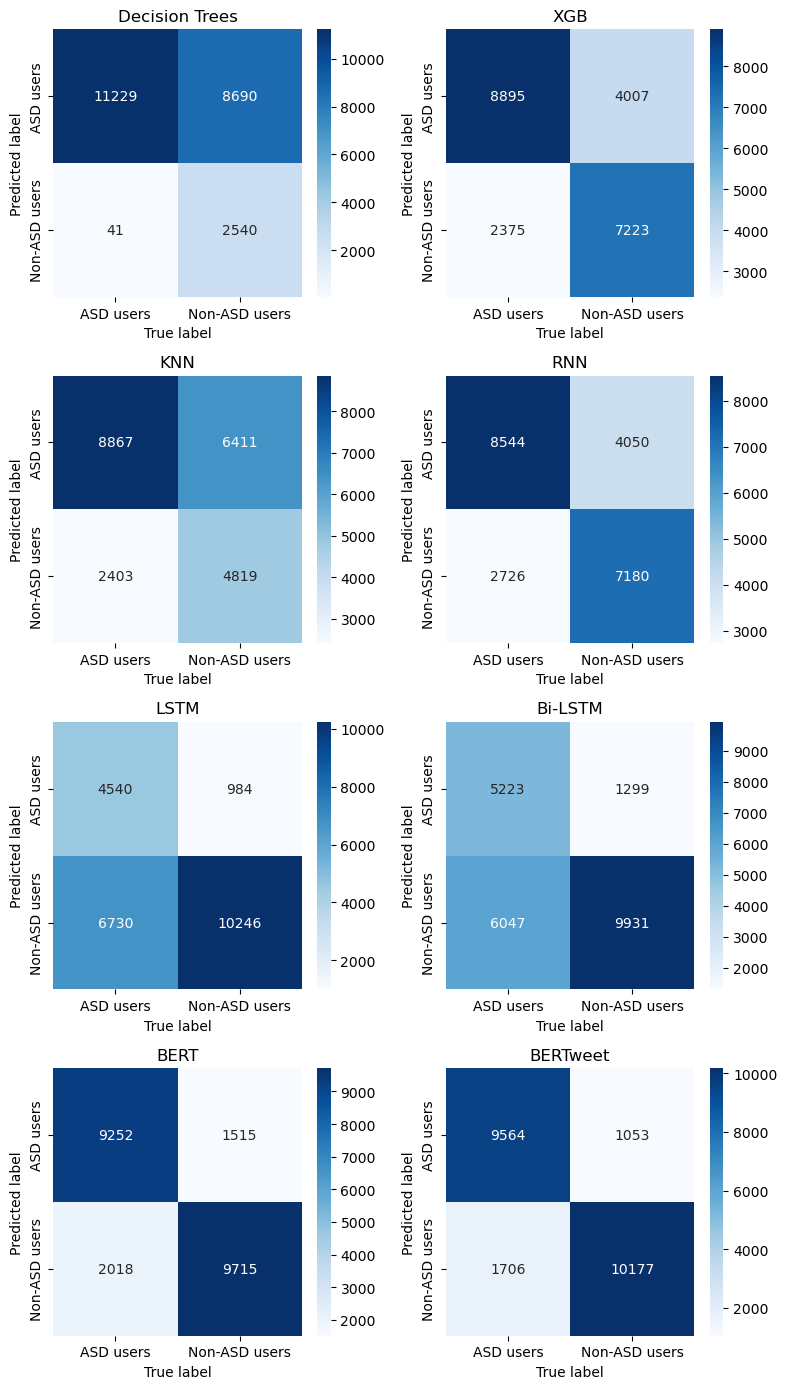

"\nplt.figure(figsize=(8,10))\n\nplt.subplot(4,2,1)  # 1 fila, 3 columnas, primer gráfico\nsns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')\nlabels = ['ASD users', 'Non-ASD users'] # Aquí reemplazas por las etiquetas que quieras\nplt.title('Decision Trees')\nplt.xlabel('True label')\nplt.ylabel('Predicted label')\n\n\nplt.subplot(4,2,2)  # 1 fila, 3 columnas, segundo gráfico\nsns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')\nplt.title('XGB')\nplt.xlabel('True label')\nplt.ylabel('Predicted label')\n\nplt.subplot(4,2,3)  # 1 fila, 3 columnas, tercer gráfico\nsns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')\nplt.title('KNN')\nplt.xlabel('True label')\nplt.ylabel('Predicted label')\n\nplt.subplot(4,2,4)  # 1 fila, 3 columnas, tercer gráfico\nsns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues')\nplt.title('RNN')\nplt.xlabel('True label')\nplt.ylabel('Predicted label')\n\nplt.subplot(4,2,5)  # 1 fila, 3 columnas, tercer gráfico\nsns.h

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supongamos que tus métricas son las siguientes y Creamos la matriz de confusión
TP = 11229
TN = 2540
FP = 8690
FN = 41
conf_matrix_tree = np.array([[TP, FP], [FN, TN]])

TP = 8895
TN = 7223
FP = 4007
FN = 2375
conf_matrix_xgb = np.array([[TP, FP], [FN, TN]])

TP = 8867
TN = 4819
FP = 6411
FN = 2403
conf_matrix_knn = np.array([[TP, FP], [FN, TN]])

TP = 8544
TN = 7180
FP = 4050
FN = 2726
conf_matrix_rnn = np.array([[TP, FP], [FN, TN]])

TP = 4540
TN = 10246
FP = 984
FN = 6730
conf_matrix_lstm = np.array([[TP, FP], [FN, TN]])

TP = 5223
TN = 9931
FP = 1299
FN = 6047
conf_matrix_bilstm = np.array([[TP, FP], [FN, TN]])

TP = 9252
TN = 9715
FP = 1515
FN = 2018
conf_matrix_bert = np.array([[TP, FP], [FN, TN]])

TP = 9564
TN = 10177
FP = 1053
FN = 1706
conf_matrix_bertweet = np.array([[TP, FP], [FN, TN]])




fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8,14))

labels = ['ASD users', 'Non-ASD users'] # Aquí reemplazas por las etiquetas que quiero

conf_matrices = [conf_matrix_tree, conf_matrix_xgb, conf_matrix_knn, conf_matrix_rnn, conf_matrix_lstm, conf_matrix_bilstm, conf_matrix_bert, conf_matrix_bertweet]
titles = ['Decision Trees', 'XGB', 'KNN', 'RNN', 'LSTM', 'Bi-LSTM', 'BERT', 'BERTweet']

for ax, conf_matrix, title in zip(axes.flatten(), conf_matrices, titles):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title(title)
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


'''
plt.figure(figsize=(8,10))

plt.subplot(4,2,1)  # 1 fila, 3 columnas, primer gráfico
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
labels = ['ASD users', 'Non-ASD users'] # Aquí reemplazas por las etiquetas que quieras
plt.title('Decision Trees')
plt.xlabel('True label')
plt.ylabel('Predicted label')


plt.subplot(4,2,2)  # 1 fila, 3 columnas, segundo gráfico
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGB')
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.subplot(4,2,3)  # 1 fila, 3 columnas, tercer gráfico
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN')
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.subplot(4,2,4)  # 1 fila, 3 columnas, tercer gráfico
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues')
plt.title('RNN')
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.subplot(4,2,5)  # 1 fila, 3 columnas, tercer gráfico
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM')
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.subplot(4,2,6)  # 1 fila, 3 columnas, tercer gráfico
sns.heatmap(conf_matrix_bilstm, annot=True, fmt='d', cmap='Blues')
plt.title('Bi-LSTM')
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.subplot(4,2,7)  # 1 fila, 3 columnas, tercer gráfico
sns.heatmap(conf_matrix_bert, annot=True, fmt='d', cmap='Blues')
plt.title('BERT')
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.subplot(4,2,8)  # 1 fila, 3 columnas, tercer gráfico
sns.heatmap(conf_matrix_bertweet, annot=True, fmt='d', cmap='Blues')
plt.title('BERTweet')
plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()
'''



In [34]:
##### TEMP

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping


from tensorflow.keras import backend as K

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X_train))

model_LSTMs = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_LSTMs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trai

In [36]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X_train))

model_LSTMss = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_LSTMss.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 101,249
Trainable params: 101,249
Non-trainable params: 0
________________________________________________